# Exploratory Analysis of OpenImage Data
What images have I downloaded, what classes do they represent, etc etc

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data_path = "/run/media/kevin/Volume/OpenImages/"

In [6]:
# get file names
files = os.listdir(os.path.join(data_path, "pics"))
print(f"{len(files)} images downloaded")
image_ids = [x.replace(".jpg", "") for x in files]

# load class descriptions
# load class descriptions
cls = pd.read_csv(os.path.join(data_path, "class-descriptions-boxable.csv"), header=None, index_col=0)


# load image labels
labs = pd.read_csv(os.path.join(data_path, "train-annotations-human-imagelabels-boxable.csv"))
labs.head()

300424 images downloaded


,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,verification,/m/014j1m,0
1,000002b66c9c498e,verification,/m/014sv8,1
2,000002b66c9c498e,verification,/m/01599,0
3,000002b66c9c498e,verification,/m/015p6,0
4,000002b66c9c498e,verification,/m/015x4r,0


In [7]:
# filter labels for available pics
labs = labs[labs['ImageID'].isin(image_ids)]
print(len(set(labs['ImageID'])))

300424


In [8]:
np.median(labs['LabelName'].value_counts())

576.0

## Images
Look at some of the images

00013ec42a6a93a5
0
/m/01knjb            Billboard
/m/02dl1y                  Hat
/m/07c52            Television
/m/07cx4             Telephone
/m/05s2s                 Plant
/m/03grzl       Baseball glove
/m/0k65p            Human hand
/m/0h8mhzd      Sports uniform
/m/05y5lj     Sports equipment
/m/03120                  Flag
/m/057p5t           Scoreboard
/m/018xm                  Ball
/m/0cnyhnx                Bull
/m/09j2d              Clothing
/m/04yx4                   Man
/m/01g317               Person
Name: 1, dtype: object


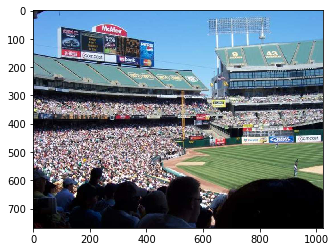

In [11]:
idx = 200
img_id = image_ids[idx]
print(img_id)
# load and show image
im = Image.open(os.path.join(data_path,"pics",files[idx]))
plt.imshow(im)


# get labels
tmp = labs.loc[[x == img_id for x in list(labs['ImageID'])]]
#tmp = tmp[tmp['Confidence'] == 1]
tmp_labels = list(set(tmp['LabelName']))
print(cls.loc[tmp_labels,:].iloc[:,0])